In [13]:
import numpy as np
import copy
import pylab
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.colors as colors
# defining test functions

def func(x):
    return (x[0] ** 2 + x[1] - 11) ** 2 + (x[0] + x[1] ** 2 - 7) ** 2

def func1(x):
    return (-20.0 * math.exp(-0.2 * math.sqrt(0.5 * (x[0]**2 + x[1]**2))) - math.exp(0.5 * (math.cos(2 * math.pi * x[0]) + math.cos(2 * math.pi * x[1]))) + math.e + 20)

def create_antibody(quan, leng, dim):
    population = [np.random.choice([0, 1], size=(dim, leng)) for x in range (quan)]
    return population

def convert(antibody, area):# координати - код Гріна -> к-ти - дійсні числа
    x = []
    for i in range (0,len(antibody)):
        summ=0
        for k in range (len(antibody[i])):
            summ+=antibody[i][k]*2**k 
        x.append(summ)
        x[i]=area[i][0]+x[i]*((area[i][1]-area[i][0])/(2**len(antibody[i])-1))
    return x

def affinity(dec_antibody,function):
    return function(dec_antibody)

def clone(population, quan_c):
    return [[copy.copy(population[i]) for x in range (quan_c)] for i in range(len(population))]

def mutate(clones, prob):
    num = int(prob*len(clones[0][0][0]))
    for s in range(len(clones)):
        for i in range(len(clones[s])):
            for n in range (0,len(clones[s][i])):
                el = np.random.choice(range(0,len(clones[s][i][n])),num, replace=False)
                for p in el:
                    clones[s][i][n][p]=int(not(clones[s][i][n][p]))
    return clones

def select(clones,aff):
    final_clones=[clones[i][aff[i].index(min(aff[i]))] for i in range(len(clones))]
    return final_clones

def replace(population, final_clones, aff_ant, aff_c):
    for i in range(len(population)):
        if aff_ant[i]>aff_c[i]:
            population[i]=final_clones[i]
            aff_ant[i]=aff_c[i]
            
def edit(population,d,func,leng,dim,aff_ant):
    for i in range(d):
        num = aff_ant.index(max(aff_ant))
        del(aff_ant[num])
        del(population[num])
    population+=create_antibody(d, leng, dim)
def clon_alg(func, quan, leng, dim, area, prob, quan_c, gen, d):
    population=create_antibody(quan, leng, dim)
    for number in range(0,gen):
        con_ant=[]
        for i in range(quan):
            con_ant.append(convert(population[i],area))
            for k in range(dim):
                xdot[k].append(con_ant[i][k])
        aff_ant=[affinity(con_ant[i],func) for i in range(quan)]
        zdot.extend(aff_ant)
        clones = mutate(clone(population,quan_c),prob)
        aff_c=[[affinity(convert(clones[s][i],area),func) for i in range(quan_c)] for s in range(quan)]
        clones=select(clones,aff_c)
        for i in range(quan):
            aff_c[i]=min(aff_c[i])
        replace(population, clones, aff_ant, aff_c)
        edit(population,d,func,leng,dim,aff_ant)
    ans=population[aff_ant.index(min(aff_ant))]
    return convert(ans, area)
xdot=[]
[xdot.append([]) for i in range(2)]
zdot=[]
clon_alg(func4, 100, 22, 2, [[-1,1],[-1,1]], 0.3, 10, 50, 5)


[0.9999570846455299, -0.9973893159364023]

C:\Users\3CDE~1\AppData\Local\Temp/ipykernel_2232/3897985041.py:12: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes = Axes3D(fig)


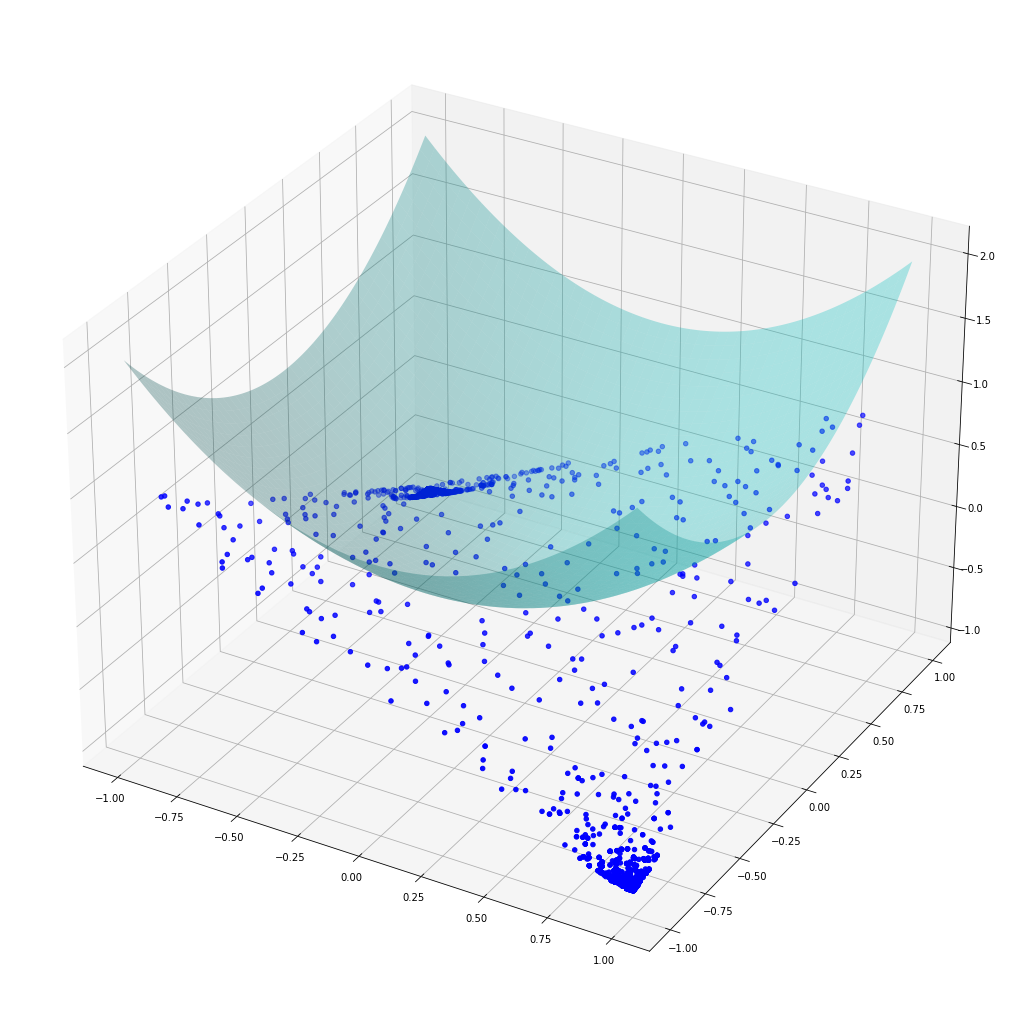

In [20]:
def makeData ():
    x = np.arange (-1, 1, 0.001)
    y = np.arange (-1, 1, 0.001)
    xgrid, ygrid = np.meshgrid(x, y)

    zgrid = func1([xgrid,ygrid])
    return xgrid, ygrid, zgrid

x, y, z = makeData()

fig = pylab.figure()
axes = Axes3D(fig)

axes.scatter(xdot[0],xdot[1],zdot,c='b',s=20)
axes.plot_surface(x, y, z,color='c', alpha = 0.3)

fig.set_figwidth(14)
fig.set_figheight(14)

pylab.show()